In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.stats import gamma
from scipy.optimize import curve_fit

## Reads in the .csv files for plotting together
Asks for how many .csv files you would like to plot first, then you input the path name to each .csv file you would like to plot. Note that the first .csv file will be first in the legend etc.

In [2]:
def load_csv_files(num_files):
    data_dict = {}
    
    for i in range(num_files):
        file_path = input(f"Enter the path of CSV file {i + 1}: ")
        filename = file_path.split("/")[-1]  # Extract the filename from the path
        if filename.endswith('.csv'):
            with open(file_path, 'r') as csv_file:
                csv_reader = csv.reader(csv_file)
                next(csv_reader)  # Skip the first row
                data = [[float(value) for value in row] for row in csv_reader]  # Cast values to float
                data_dict[filename] = data
        else:
            print(f"{filename} is not a CSV file. Skipping...")

    return data_dict

if __name__ == "__main__":
    num_files = int(input("Enter the number of CSV files to load: "))
    CDF_data = load_csv_files(num_files)
    
# Flatten the nested lists
CDF_data = {key: [item for sublist in values for item in sublist] for key, values in CDF_data.items()}

Enter the number of CSV files to load: 1
Enter the path of CSV file 1: /Users/steinar/Documents/Data/4 - cell vs. endosomal membrane in fusion/3 - IAV content mixing with PMVs/content mixing kinetics/BMP liposome content mixing 1-4 merged.csv


# Remove ending from filenames

In [18]:
corrected_CDF_data = {}
for key, value in CDF_data.items():
    new_key = key[:-29]  # Remove the last 30 characters from the key
    corrected_CDF_data[new_key] = value
    
CDF_data = corrected_CDF_data

## Plot the CDF figure and save to desktop

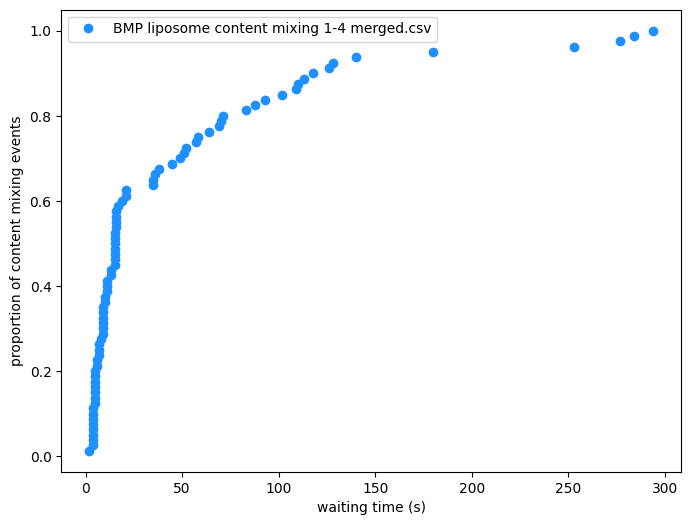

In [3]:
def cdf_gamma_fit(x, a, loc, scale):
    return gamma.cdf(x, a, loc=loc, scale=scale)

# Create a single plot with all dataframes
plt.figure(figsize=(8, 6))

# Define a color scheme for each dataset
colors = ['dodgerblue', 'blue', 'lightcoral', 'red', 'tomato', 'grey', 'grey', 'grey']

# Loop through the dataframes in the 'CDF_data' dictionary
for i, (df_name, df_item) in enumerate(CDF_data.items()):
    n = len(df_item)
    x = np.sort(df_item)
    y = np.arange(1, n + 1) / n

    try:
        # Fit a gamma distribution to the data
        # Adjust the initial guesses based on the characteristics of your data
        #params, _ = curve_fit(cdf_gamma_fit, x, y, p0=[1, 2, 1])

        # Plot the CDF with a unique color for each dataset
        plt.plot(x, y, marker='o', linestyle='none', color=colors[i], label=f'{df_name}')

        # Plot the best-fitting curve (gamma distribution)
        x_fit = np.linspace(min(x), max(x), 100)
        #y_fit = cdf_gamma_fit(x_fit, *params)
        #plt.plot(x_fit, y_fit, '--', color=colors[i])
    except RuntimeError:
        print(f"Fit for {df_name} did not converge.")

# Customize the plot
plt.xlabel('waiting time (s)')
plt.ylabel('proportion of content mixing events')
plt.legend()  

# Save the figure as a PDF file
folder = '/Users/steinar/Desktop'
filename = '/combined CDF plot.pdf'
plt.savefig(folder + filename, format='pdf', bbox_inches = 'tight')

plt.show()

## calculate median fusion times

In [21]:
median_fusion_time = {}  # Initialize a new dictionary to store the medians

# Loop through the dataframes in the "df" dictionary
for key, df_item in CDF_data.items():
    # Calculate the median for each dataframe and store it in the new dictionary
    median_fusion_time[key] = np.median(df_item)

# Print or use the "median_fusion" dictionary
print("Median Fusion times:")
for key, median_value in median_fusion_time.items():
    print(f"{key}: {median_value}" + " seconds")

Median Fusion times:
IAV + control liposome : 9.0 seconds
IAV + BMP liposome : 5.0 seconds
IAV + PMV : 7.0 seconds
IAV + PMV + 50 mol % BMP : 53.5 seconds
